In [1]:
import numpy as np
import pandas as pd
from cosmological_weight import CosmologicalWeight
import matplotlib.pyplot as plt
plt.style.use("plots/mesa.mplstyle")

In [2]:
# LGRB and SFR model parameters
eta = 0.01
beaming_method = 'const=0.05'
SFR = 'Illustris'

In [3]:
# load BBHs from a hybrid POSYDON pop synth (CE/SMT cosmic+MESA, CHE MESA) see arXiv:2106.15841
df_CE = pd.read_csv('./datasets/arXiv_2106.15841_CE_alpha_0.5.csv.gz', compression='gzip')
df_SMT = pd.read_csv('./datasets/arXiv_2106.15841_SMT.csv.gz', compression='gzip')
df_CHE = pd.read_csv('./datasets/arXiv_2106.15841_CHE.csv.gz', compression='gzip')

In [4]:
# CE channel
# match df.columns to class_variables
class_variables = ['totalMassEvolvedForZ', 'channel', 'optimistic', 'metallicity', 'm_BH1', 'm_star2_postCE', 'm_BH2',
                 'spin_BH1', 'spin_BH2', 'm_disk_rad', 'max_he_mass_ejected', 'p_postCE', 'p_f', 'e_f', 
                   'tilt_BH2', 'Dt_binary', 'Dt_inspiral']
pop_CE = CosmologicalWeight(df_CE, columns=df_CE.columns.tolist(), class_variables=class_variables,
                            eta=eta, beaming_method=beaming_method, SFR=SFR, LGRB_properties=True)

sensitivity = 'infinite'
pop_CE.RunBBHsSimulation(sensitivity, flag_pdet=False, path_to_dir='../')
index_CE_BBH, z_formation_CE_BBH, z_merger_CE_BBH, s_i_CE_BBH = pop_CE.loadBBHsSimulation(sensitivity, path_to_dir='../')
z = pop_CE.getRedshiftBinCenter()
R_CE_BBH= pop_CE.RateDensity(s_i_CE_BBH, z_merger_CE_BBH, Type='BBHs', sensitivity='infinite')
print('CE: BBH merger rate density in the local Universe (z~%1.2f):'%z[0], round(R_CE_BBH[0],2), 'Gpc^-3 yr^-1')

pop_CE.RunGRBsSimulation(sensitivity, path_to_dir='../')
index_CE_LGRB, z_formation_CE_LGRB, z_CE_LGRB, s_i_CE_LGRB = pop_CE.loadGRBsSimulation(sensitivity, path_to_dir='../')
R_CE_LGRB = pop_CE.RateDensity(s_i_CE_LGRB, z_CE_LGRB, Type='GRBs', sensitivity='beamed', index=index_CE_LGRB)
print('CE: LGRB rate density in the local Universe (z~%1.2f):'%z[0], round(R_CE_LGRB[0],2), 'Gpc^-3 yr^-1')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [02:34<00:00,  1.12s/it]


CE: BBH merger rate density in the local Universe (z~0.00): 11.21 Gpc^-3 yr^-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [01:31<00:00,  1.50it/s]


CE: LGRB rate density in the local Universe (z~0.00): 0.06 Gpc^-3 yr^-1


In [5]:
# SMT channnel
pop_SMT = CosmologicalWeight(df_SMT, columns=df_SMT.columns.tolist(), class_variables=class_variables,
                            eta=eta, beaming_method=beaming_method, SFR=SFR, LGRB_properties=True)

sensitivity = 'infinite'
pop_SMT.RunBBHsSimulation(sensitivity, flag_pdet=False, path_to_dir='../')
index_SMT_BBH, z_formation_SMT_BBH, z_merger_SMT_BBH, s_i_SMT_BBH = pop_SMT.loadBBHsSimulation(sensitivity, path_to_dir='../')
z = pop_SMT.getRedshiftBinCenter()
R_SMT_BBH= pop_SMT.RateDensity(s_i_SMT_BBH, z_merger_SMT_BBH, Type='BBHs', sensitivity='infinite')
print('SMT: BBH merger rate density in the local Universe (z~%1.2f):'%z[0], round(R_SMT_BBH[0],2), 'Gpc^-3 yr^-1')

pop_SMT.RunGRBsSimulation(sensitivity, path_to_dir='../')
index_SMT_LGRB, z_formation_SMT_LGRB, z_SMT_LGRB, s_i_SMT_LGRB = pop_SMT.loadGRBsSimulation(sensitivity, path_to_dir='../')
R_SMT_LGRB = pop_SMT.RateDensity(s_i_SMT_LGRB, z_SMT_LGRB, Type='GRBs', sensitivity='beamed', index=index_SMT_LGRB)
print('SMT: LGRB rate density in the local Universe (z~%1.2f):'%z[0], round(R_SMT_LGRB[0],2), 'Gpc^-3 yr^-1')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [01:19<00:00,  1.74it/s]


SMT: BBH merger rate density in the local Universe (z~0.00): 22.14 Gpc^-3 yr^-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [00:05<00:00, 23.97it/s]


SMT: LGRB rate density in the local Universe (z~0.00): 0.0 Gpc^-3 yr^-1


In [6]:
# CHE channel
# match df.columns to class_variables
class_variables = ['totalMassEvolvedForZ', 'metallicity', 'm_star1_i', 'q_i', 'm_BH1',
                    'm_disk_rad', 'p_i', 'p_f', 'spin_BH1',
                    'Dt_binary', 'Dt_inspiral', 'e_f', 'max_he_mass_ejected', 'm_BH2','spin_BH2']
pop_CHE = CosmologicalWeight(df_CHE, columns=df_CHE.columns.tolist(), class_variables=class_variables,
                            eta=eta, beaming_method=beaming_method, SFR=SFR, LGRB_properties=True)

sensitivity = 'infinite'
pop_CHE.RunBBHsSimulation(sensitivity, flag_pdet=False, path_to_dir='../')
index_CHE_BBH, z_formation_CHE_BBH, z_merger_CHE_BBH, s_i_CHE_BBH = pop_CHE.loadBBHsSimulation(sensitivity, path_to_dir='../')
z = pop_CHE.getRedshiftBinCenter()
R_CHE_BBH= pop_CHE.RateDensity(s_i_CHE_BBH, z_merger_CHE_BBH, Type='BBHs', sensitivity='infinite')
print('CHE: BBH merger rate density in the local Universe (z~%1.2f):'%z[0], round(R_CHE_BBH[0],2), 'Gpc^-3 yr^-1')

pop_CHE.RunGRBsSimulation(sensitivity, path_to_dir='../')
index_CHE_LGRB, z_formation_CHE_LGRB, z_CHE_LGRB, s_i_CHE_LGRB = pop_CHE.loadGRBsSimulation(sensitivity, path_to_dir='../')
R_CHE_LGRB = pop_CHE.RateDensity(s_i_CHE_LGRB, z_CHE_LGRB, Type='GRBs', sensitivity='beamed', index=index_CHE_LGRB)
print('CHE: LGRB rate density in the local Universe (z~%1.2f):'%z[0], round(R_CHE_LGRB[0],2), 'Gpc^-3 yr^-1')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [00:08<00:00, 17.04it/s]


CHE: BBH merger rate density in the local Universe (z~0.00): 5.26 Gpc^-3 yr^-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [00:03<00:00, 34.60it/s]


CHE: LGRB rate density in the local Universe (z~0.00): 0.01 Gpc^-3 yr^-1


<Figure size 1014x760.5 with 0 Axes>

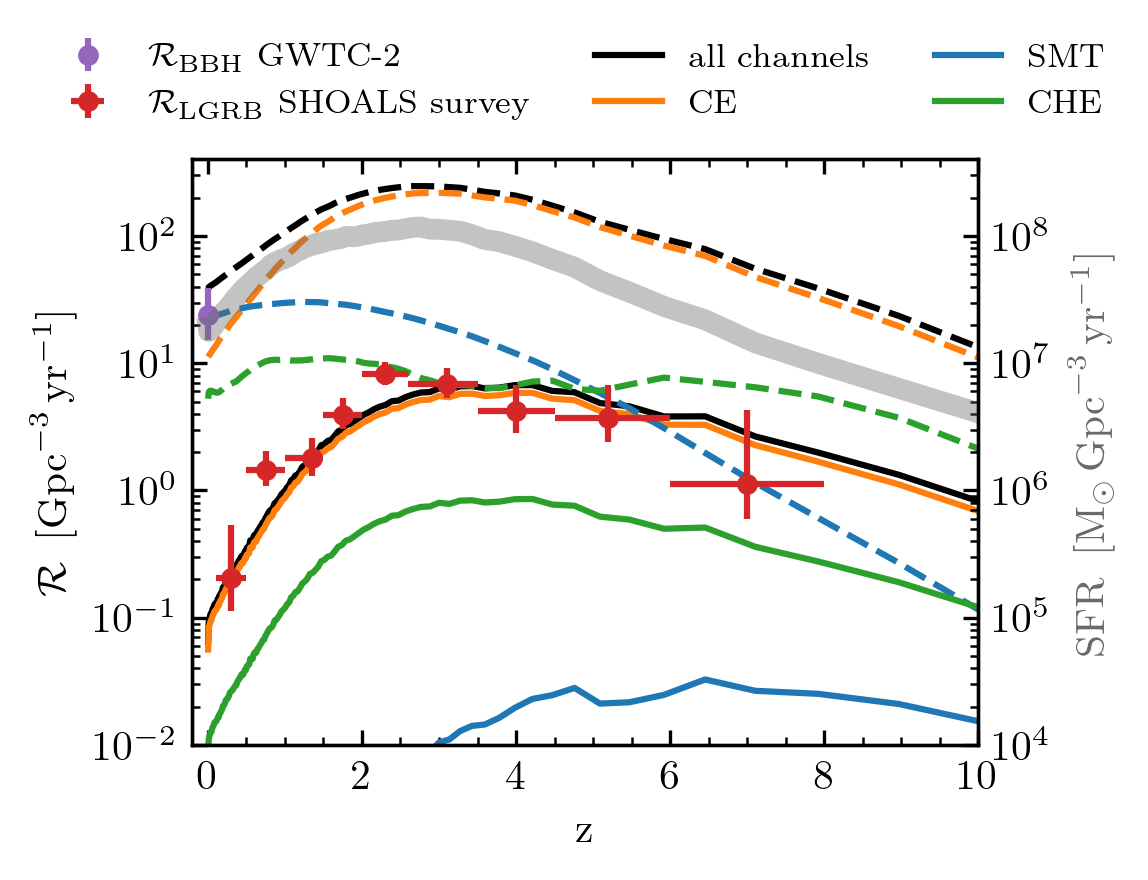

In [7]:
plt.figure()
fig, ax1 = plt.subplots()
plt.yscale('log')
plt.xlim(-0.2,10)
plt.ylim(1e-2,400)
plt.xlabel('z')
plt.ylabel('$\mathcal{R} \, \, \, [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$')

p1, = ax1.plot(z, R_CE_BBH+R_SMT_BBH+R_CHE_BBH, color='black', linestyle='--')
p2, = ax1.plot(z, R_CE_LGRB+R_SMT_LGRB+R_CHE_LGRB, color='black', linestyle='-', label='all channels')
p3, = ax1.plot(z, R_CE_BBH, color='tab:orange', linestyle='--')
p4, = ax1.plot(z, R_CE_LGRB, color='tab:orange', linestyle='-', label=r'CE') # CE LGRBs: E_GRB_iso > 10^51 ergs
p5, = ax1.plot(z, R_SMT_BBH, color='tab:blue', linestyle='--')
p6, = ax1.plot(z, R_SMT_LGRB, color='tab:blue', linestyle='-', label='SMT') # SMT LGRBs: E_GRB_iso > 10^51 ergs
p7, = ax1.plot(z, R_CHE_BBH, color='tab:green', linestyle='--')
p8, = ax1.plot(z, R_CHE_LGRB, color='tab:green', linestyle='-', label='CHE') # CHE LGRBs: E_GRB_iso > 10^51 ergs (count twice)


# Perley et al. (2016)
z_P16 = np.array([0.3,0.75,1.35,1.75,2.3,3.1,4,5.2,7.])
rate_P16 = np.array([2.07e-10,1.46e-09,1.81e-09,3.93e-09,8.27e-09,6.89e-09,4.20e-09,3.74e-09,1.12e-09])*1e9
rate_P16_lower = rate_P16-np.array([1.12e-10,1.08e-09,1.30e-09,3.02e-09,6.78e-09,5.29e-09,2.82e-09,2.39e-09,5.96e-10])*1e9
rate_P16_upper = np.array([5.40e-10,2.03e-09,2.60e-09,5.29e-09,1.03e-08,9.13e-09,6.78e-09,6.78e-09,4.27e-09])*1e9-rate_P16
rate_P16_error_y =np.array([rate_P16_lower.tolist(),rate_P16_upper.tolist()])

rate_P16_left = z_P16-np.array([0.1,0.5,1,1.5,2.,2.6,3.5,4.5,6])
rate_P16_right = np.array([0.5,1,1.5,2.,2.6,3.5,4.5,6,8])-z_P16
rate_P16_error_x =np.array([rate_P16_left.tolist(),rate_P16_right.tolist()])
p9 = ax1.errorbar(z_P16,rate_P16,xerr=rate_P16_error_x,yerr=rate_P16_error_y,fmt='o',color='tab:red', 
                  label='$\mathcal{R}_\mathrm{LGRB}$ SHOALS survey') #: $E^\mathrm{LGRB}_{\mathrm{iso}, 45-450\,\mathrm{keV}} > 10^{51} \, \mathrm{erg}$')
# GWTC-2 Abbott et al. (2021)
p10 = ax1.errorbar(0,23.9,yerr=[[8.6],[14.9]],fmt='o',color='tab:purple', label='$\mathcal{R}_\mathrm{BBH}$ GWTC-2')

ax2 = ax1.twinx()
plt.yscale('log')
plt.ylim(1e4,4e8)
plt.xlabel('z')
plt.ylabel('$\mathrm{SFR} \, \, \, [\mathrm{M}_\odot \, \mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$', color='dimgray')

SFR = pop_CE.StarFormationRate(z)*1e9 # Msun yr^-1 Gpc^-3
s1, = ax2.plot(z, SFR, color='dimgray', linewidth=5, alpha=0.4,linestyle='-', label='SFR')

lgd2 = plt.legend(handles=[p10,p9,p2,p4,p6,p8], bbox_to_anchor=(1.2, 1.25), ncol=3)
plt.savefig('./plots/arXiv_210615841_R_BBH_LGRB.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# chi_eff vs m_chirp plot
from corner import hist2d
from matplotlib.patches import Patch

In [9]:
#### underlying BBH population (infinite sensitivity)

# compute chi_eff and m_chirp
chi_eff_CE_inf = pop_CE.getData('chi_eff',index_CE_BBH)
m_chirp_CE_inf = pop_CE.getData('Mchirp',index_CE_BBH)
chi_eff_SMT_inf = pop_SMT.getData('chi_eff',index_SMT_BBH)
m_chirp_SMT_inf = pop_SMT.getData('Mchirp',index_SMT_BBH)
chi_eff_CHE_inf = pop_CHE.getData('chi_eff',index_CHE_BBH)
m_chirp_CHE_inf = pop_CHE.getData('Mchirp',index_CHE_BBH)


# concatenate channels in a single datasets  
mask_CHE_inf = np.invert(m_chirp_CHE_inf > 95.) # mask BBHs above the PISN gap, not modeled for CE/SMT
sample_inf = np.array([np.concatenate((chi_eff_CE_inf,chi_eff_SMT_inf,chi_eff_CHE_inf[mask_CHE_inf])),
                   np.concatenate((m_chirp_CE_inf,m_chirp_SMT_inf,m_chirp_CHE_inf[mask_CHE_inf]))])
w_sample_inf = np.concatenate((s_i_CE_BBH,s_i_SMT_BBH,s_i_CHE_BBH[mask_CHE_inf]))


#### underlying BBH population (infinite sensitivity) fraction associated to a luminous LGRB

CE_LGRB = pop_CE.getData('flag_GRB', index_CE_BBH)
SMT_LGRB = pop_SMT.getData('flag_GRB', index_SMT_BBH)
CHE_LGRB = pop_CHE.getData('flag_GRB', index_CHE_BBH)

# concatenate channels in a single datasets  
mask_CE_LGRB = CE_LGRB
mask_SMT_LGRB = SMT_LGRB
mask_CHE_LGRB = np.logical_and(mask_CHE_inf,CHE_LGRB)
sample_LGRB = np.array([np.concatenate((chi_eff_CE_inf[mask_CE_LGRB],chi_eff_SMT_inf[mask_SMT_LGRB],chi_eff_CHE_inf[mask_CHE_LGRB])),
                   np.concatenate((m_chirp_CE_inf[mask_CE_LGRB],m_chirp_SMT_inf[mask_SMT_LGRB],m_chirp_CHE_inf[mask_CHE_LGRB]))])
w_sample_LGRB = np.concatenate((s_i_CE_BBH[mask_CE_LGRB],s_i_SMT_BBH[mask_SMT_LGRB],s_i_CHE_BBH[mask_CHE_LGRB]))

#### LIGO-Virgo O3 sensitivity detectable BBH population
# GW detector model selection accounts for z_merger, BH masses and spins see arXiv:2106.15841

def chi_eff(m_1, m_2, a_1, a_2, tilt_1, tilt_2):
    return (m_1*a_1*np.cos(tilt_1)+m_2*a_2*np.cos(tilt_2))/(m_1+m_2)

def m_chirp(m_1, m_2):
    return (m_1*m_2)**(3./5)/(m_1+m_2)**(1./5)

# load datasets with pdet computed with XXXX & compute effective spin parameter and chirp mass
path = '/Users/simone/OneDrive - unige.ch/PhD/Bavera+22a-GRBs/GRB_project/model_selection/midhighlatelow/'
data_CE = pd.read_csv(path+"CE_alpha_0.5_three_detectors.gz", compression='gzip') 
weights_CE_O3 = data_CE['weights']*data_CE['midhighlatelow_network']
chi_eff_CE_O3 = chi_eff(data_CE['m_BH1'], data_CE['m_BH2'], data_CE['a_1'], data_CE['a_2'],  data_CE['tilt_1'],  data_CE['tilt_1'])
m_chirp_CE_O3 = m_chirp(data_CE['m_BH1'], data_CE['m_BH2'])

data_SMT = pd.read_csv(path+"SMT_alpha_0.5_three_detectors.gz", compression='gzip') 
weights_SMT_O3 = data_SMT['weights']*data_SMT['midhighlatelow_network']
chi_eff_SMT_O3 = chi_eff(data_SMT['m_BH1'], data_SMT['m_BH2'], data_SMT['a_1'], data_SMT['a_2'],  data_SMT['tilt_1'],  data_SMT['tilt_1'])
m_chirp_SMT_O3 = m_chirp(data_SMT['m_BH1'], data_SMT['m_BH2'])

data_CHE = pd.read_csv(path+"CHE_three_detectors.gz", compression='gzip') 
weights_CHE_O3 = data_CHE['weights']*data_CHE['midhighlatelow_network']
chi_eff_CHE_O3 = chi_eff(data_CHE['m_BH1'], data_CHE['m_BH2'], data_CHE['a_1'], data_CHE['a_2'],  data_CHE['tilt_1'],  data_CHE['tilt_2'])
m_chirp_CHE_O3 = m_chirp(data_CHE['m_BH1'], data_CHE['m_BH2'])

# concatenate channels in a single datasets  
mask_CHE_O3 = np.invert(m_chirp_CHE_O3 > 95.) # mask BBHs above the PISN gap, not modeled for CE/SMT
sample_O3 = np.array([np.concatenate((chi_eff_CE_O3,chi_eff_SMT_O3,chi_eff_CHE_O3[mask_CHE_O3])),
                   np.concatenate((m_chirp_CE_O3,m_chirp_SMT_O3,m_chirp_CHE_O3[mask_CHE_O3]))])
w_sample_O3 = np.concatenate((weights_CE_O3,weights_SMT_O3,weights_CHE_O3[mask_CHE_O3]))

In [10]:
# GWTC-2 Abbott et al. 2020
GW_events_m_chirp_O1 = np.array([28.6,15.2,8.9])
GW_events_m_chirp_O2 = np.array([21.4,7.9,35.4,24.9,24.1,26.5,29.2])
GW_events_m_chirp_O3a = np.array([18.3,13.3,24.6,33.0,31.2,31.0,30.2,14.6,21.6,28.5,26.6,44.5,69.2,32.1,24.3,
                                  49.1,38.3,24.9,40.3,42.7,8.5,13.2,23.5,8.9,28.6,8.6,29.5,27.3,25.0,13.3,30.9,34.3,25.3,5.8,35.8,8.5]) # GW190814 removed
GW_events_m_chirp_err_O1 = np.array([[1.5,1.2,0.3],[1.7,2.1,0.3]])
GW_events_m_chirp_err_O2 = np.array([[1.8,0.2,4.8,1.7,1.1,1.7,3.6],[2.2,0.2,6.5,2.1,1.4,2.1,4.6]])
GW_events_m_chirp_err_O3a = np.array([[1.2,0.3,4.1,5.4,4.2,4.6,4.2,1.0,1.9,4.8,4.0,7.1,10.6,2.5,4.2,8.5,6.5,
                                       2.1,4.9,7.0,0.5,0.6,4.0,0.8,3.7,0.3,5.2,4.1,2.1,1.0,7.5,4.1,2.7,0.2,8.2,0.5],
                                      [1.9,0.4,5.5,8.2,5.9,5.8,4.2,1.3,3.8,7.9,4.0,6.4,17.0,3.2,9.1,9.1,8.3,
                                       2.1,5.4,10.0,0.6,0.9,6.5,0.5,5.3,0.5,7.1,5.7,3.4,1.2,17.2,4.1,3.2,0.2,14.9,0.5]]) # GW190814 removed

GW_events_chi_eff_O1 = np.array([-0.01,0.05,0.18])
GW_events_chi_eff_O2 = np.array([-0.04,0.03,0.37,0.08,0.07,-0.09,0.09])
GW_events_chi_eff_O3a = np.array([-0.03,0.25,-0.01,-0.03,-0.06,0.13,-0.03,0.03,0.11,-0.19,0.52,0.31,0.03,
                                  0.09,0.11,0.07,0.33,0.10,-0.07,0.28,-0.05,0.02,0.32,0.18,0.11,0.12,
                                  0.06,-0.03,0.19,0.08,-0.06,0.02,0.02,0.03,0.01,0.14])  # GW190814 removed
GW_events_chi_eff_err_O1 = np.array([[0.13,0.20,0.12],[0.12,0.31,0.20]])
GW_events_chi_eff_err_O2 = np.array([[0.21,0.07,0.25,0.17,0.12,0.21,0.26],[0.17,0.19,0.21,0.17,0.12,0.18,0.22]])
GW_events_chi_eff_err_O3a = np.array([[0.19,0.11,0.34,0.29,0.27,0.22,0.26,0.13,0.17,0.32,0.19,0.22,0.39,0.13,0.28,0.24,0.25,
                                       0.13,0.29,0.29,0.08,0.08,0.31,0.12,0.25,0.07,0.24,0.27,0.16,0.16,0.36,0.18,0.25,0.09,0.33,0.15], 
                                      [0.14,0.08,0.29,0.25,0.22,0.22,0.20,0.12,0.28,0.29,0.19,0.20,0.32,0.10,0.28,0.25,0.22,0.12,
                                       0.23,0.26,0.10,0.10,0.29,0.14,0.26,0.20,0.24,0.24,0.15,0.16,0.37,0.18,0.20,0.30,0.34,0.31]]) # GW190814 removed

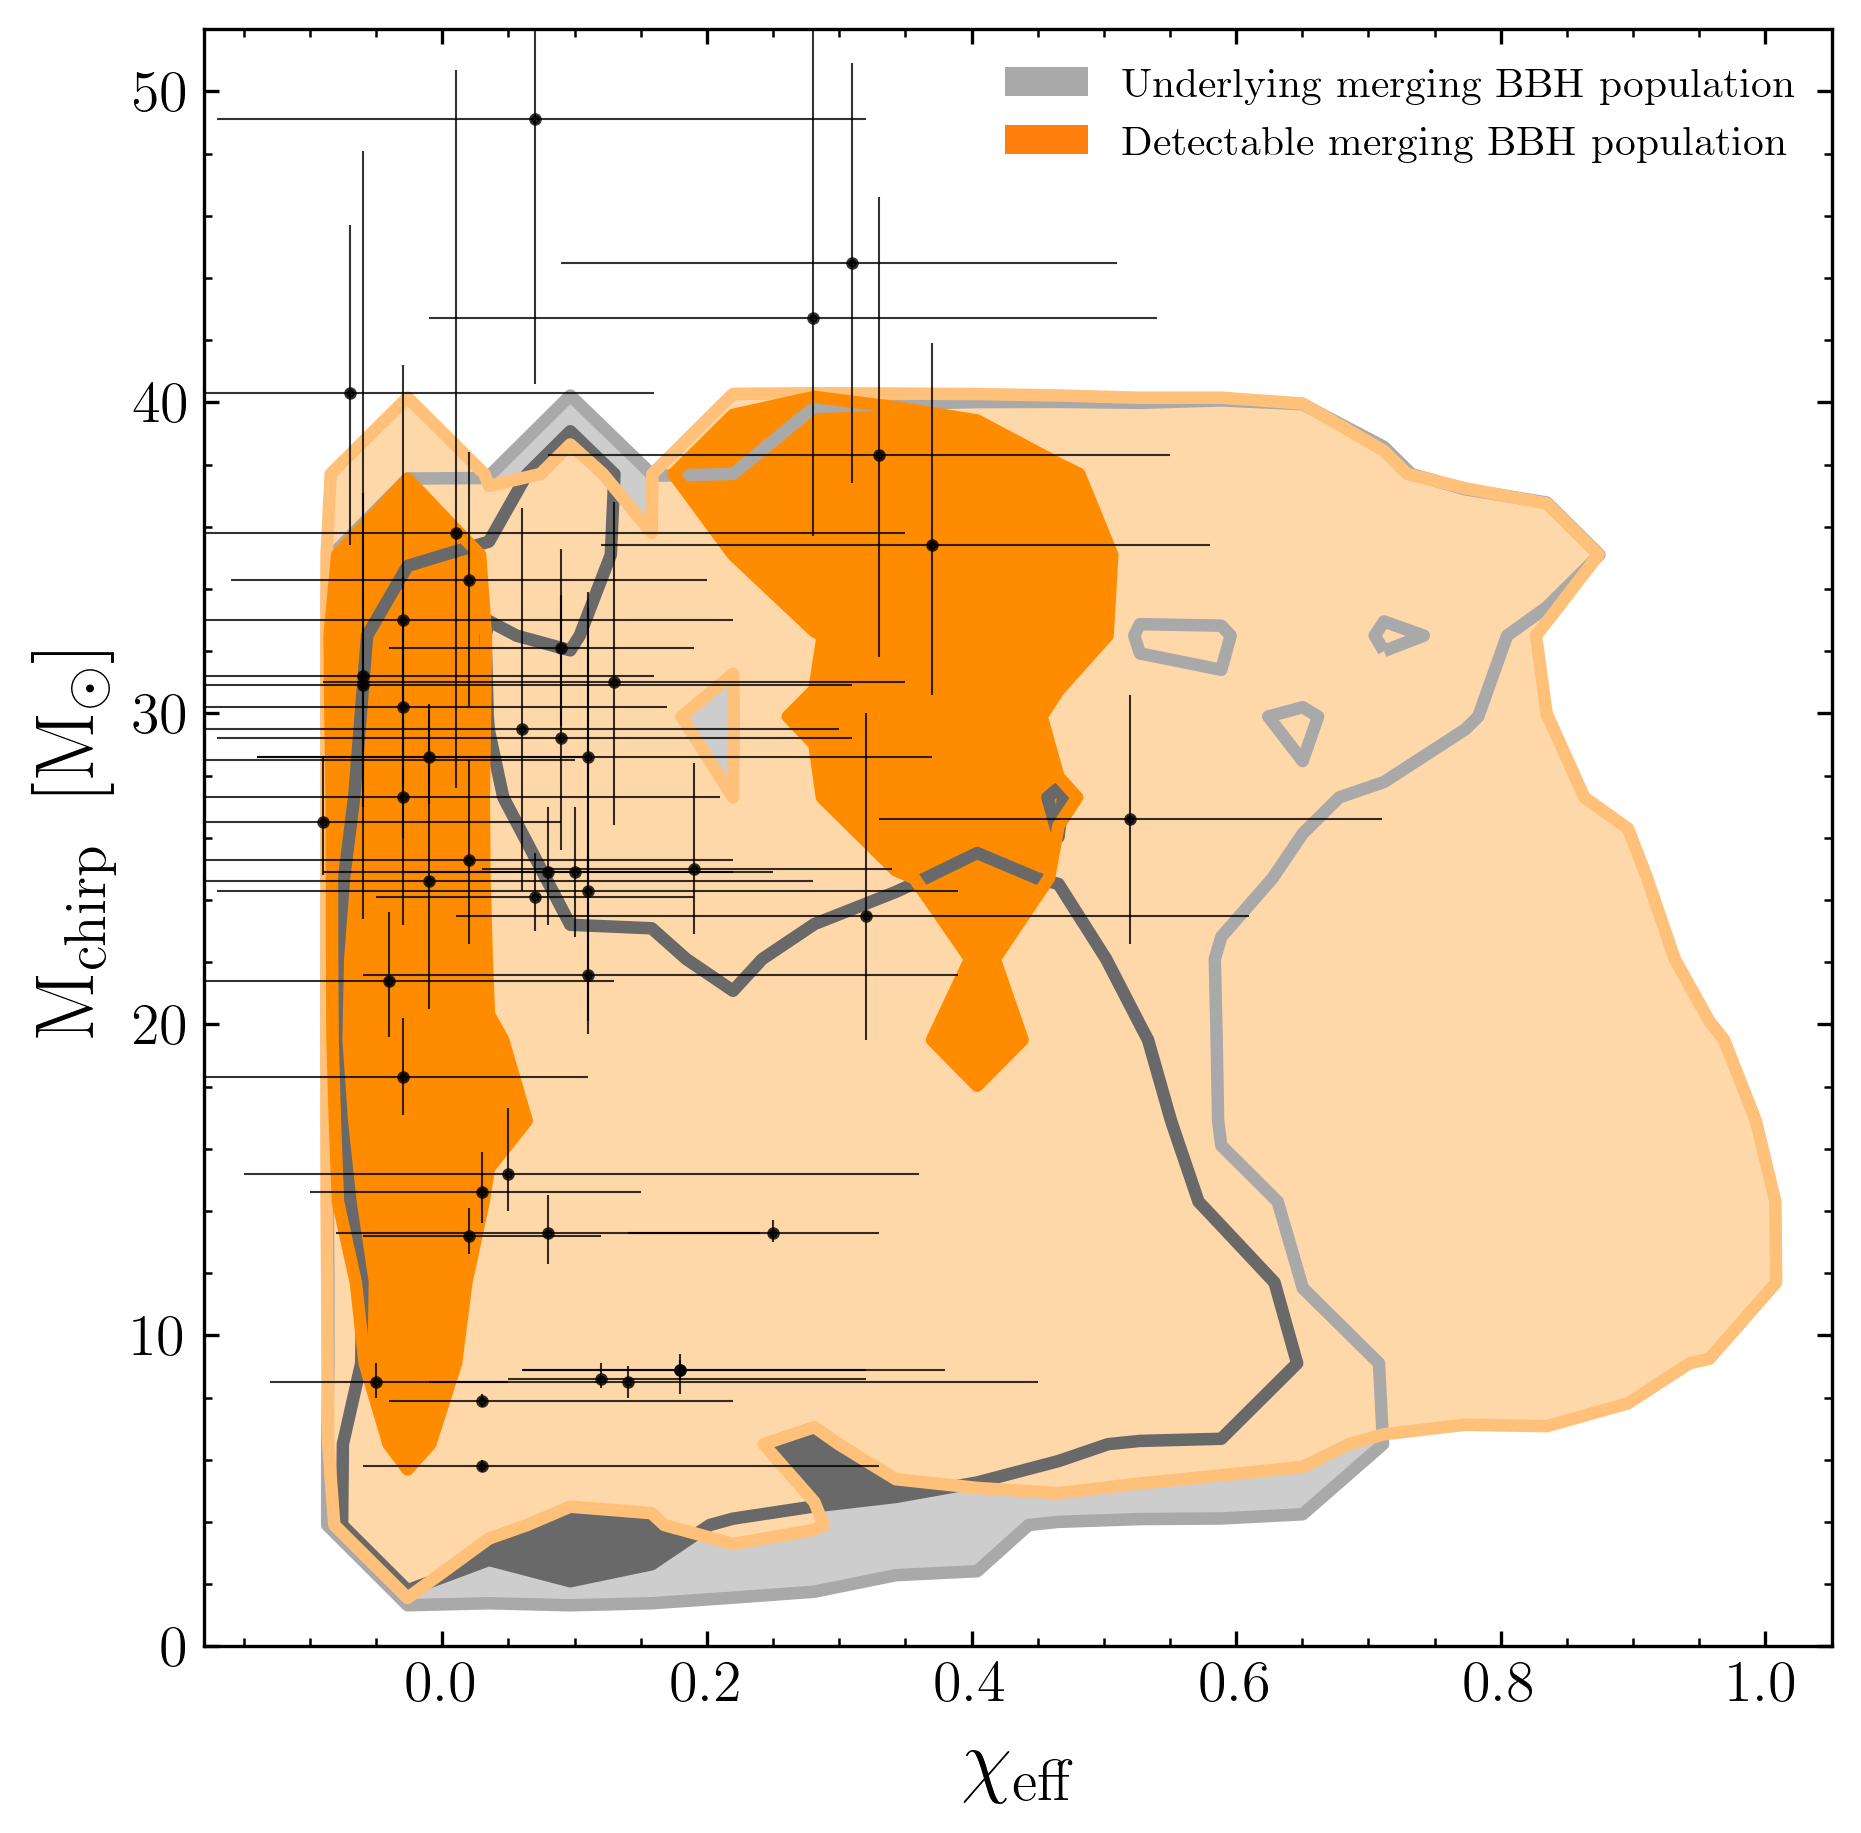

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

paramNames = [r'$\chi_\mathrm{eff}$',r'$\mathrm{M}_\mathrm{chirp} \, \, \, $[M$_\odot$]']
Min_max_panels = [[-0.18,1.05],[0.,52.]]
smooth = 0.
bins=20
plot_datapoints = False
fontsize = 20
levels=(0.90,0.999)

hist2d(sample_inf[0],
       sample_inf[1],
       fig=fig,
       bins=bins,
       weights=w_sample_inf,
       labels=paramNames,
       label_kwargs = {'fontsize' : fontsize},
       range=Min_max_panels,
       color= "dimgrey",
       smooth=smooth,
       plot_datapoints=plot_datapoints,
       fill_contours=True,
       no_fill_contours=False,
       plot_density=False,
       contour_kwargs={'linewidths':3, 'colors': ['darkgray','dimgrey']},
       levels=levels)
hist2d(sample_O3[0],
       sample_O3[1],
       fig=fig,
       bins=bins,
       weights=w_sample_O3,
       labels=paramNames,
       label_kwargs = {'fontsize' : fontsize},
       range=Min_max_panels,
       color="darkorange",
       smooth=smooth,
       plot_datapoints=plot_datapoints,
       fill_contours=True,
       plot_density=False,
       contour_kwargs={'linewidths':3, 'colors': ['#ffc17a','darkorange']},
       levels=levels)

plt.errorbar(GW_events_chi_eff_O1,GW_events_m_chirp_O1,xerr=GW_events_chi_eff_err_O1,yerr=GW_events_m_chirp_err_O1,fmt='.',elinewidth=0.5, color='black',label='O1',alpha=0.8)
plt.errorbar(GW_events_chi_eff_O2,GW_events_m_chirp_O2,xerr=GW_events_chi_eff_err_O2,yerr=GW_events_m_chirp_err_O2,fmt='.',elinewidth=0.5,color='black',label='O2',alpha=0.8)
plt.errorbar(GW_events_chi_eff_O3a,GW_events_m_chirp_O3a,xerr=GW_events_chi_eff_err_O3a,yerr=GW_events_m_chirp_err_O3a,fmt='.',elinewidth=0.5,color='black',label='O3a',alpha=0.8)

plt.xlabel(r'$\chi_\mathrm{eff}$',fontsize=fontsize)
plt.ylabel(r'$\mathrm{M}_\mathrm{chirp} \,\,\, [\mathrm{M}_\odot]$',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=14)
legend_elements = [Patch(facecolor='darkgray', label='Underlying merging BBH population'), 
                   Patch(facecolor='tab:orange', label='Detectable merging BBH population')]
plt.legend(handles=legend_elements,loc=1,fontsize=10)
plt.savefig('./plots/arXiv_210615841_chi_eff_m_chirp_BBH.pdf', dpi=300, bbox_inches='tight')

In [12]:
# GWTC-2 events with LGRB chance > 10%
GW_events_chi_eff_LGRB_special = np.array([0.52,0.33])
GW_events_chi_eff_LGRB_special_err = np.array([[0.19,0.25],[0.19,0.22]])
GW_events_chi_eff_LGRB = np.array([0.25,0.19,0.37,0.11,0.11,0.11,0.13,0.05])
GW_events_chi_eff_LGRB_err = np.array([[0.11,0.16,0.25,0.28,0.17,0.25,0.22,0.20],
                                       [0.08,0.15,0.21,0.28,0.28,0.26,0.22,0.31]])

GW_events_m_chirp_LGRB_special = np.array([26.6,23.5])
GW_events_m_chirp_LGRB_special_err = np.array([[4.0,4.0],[4.0,6.5]])
GW_events_m_chirp_LGRB = np.array([13.3,25.0,35.4,24.3,21.6,28.6,31.0,15.2])
GW_events_m_chirp_LGRB_err = np.array([[0.3,2.1,4.8,4.2,1.9,3.7,4.6,1.2],
                                       [0.4,3.4,6.5,9.1,3.8,5.3,5.8,2.1]])

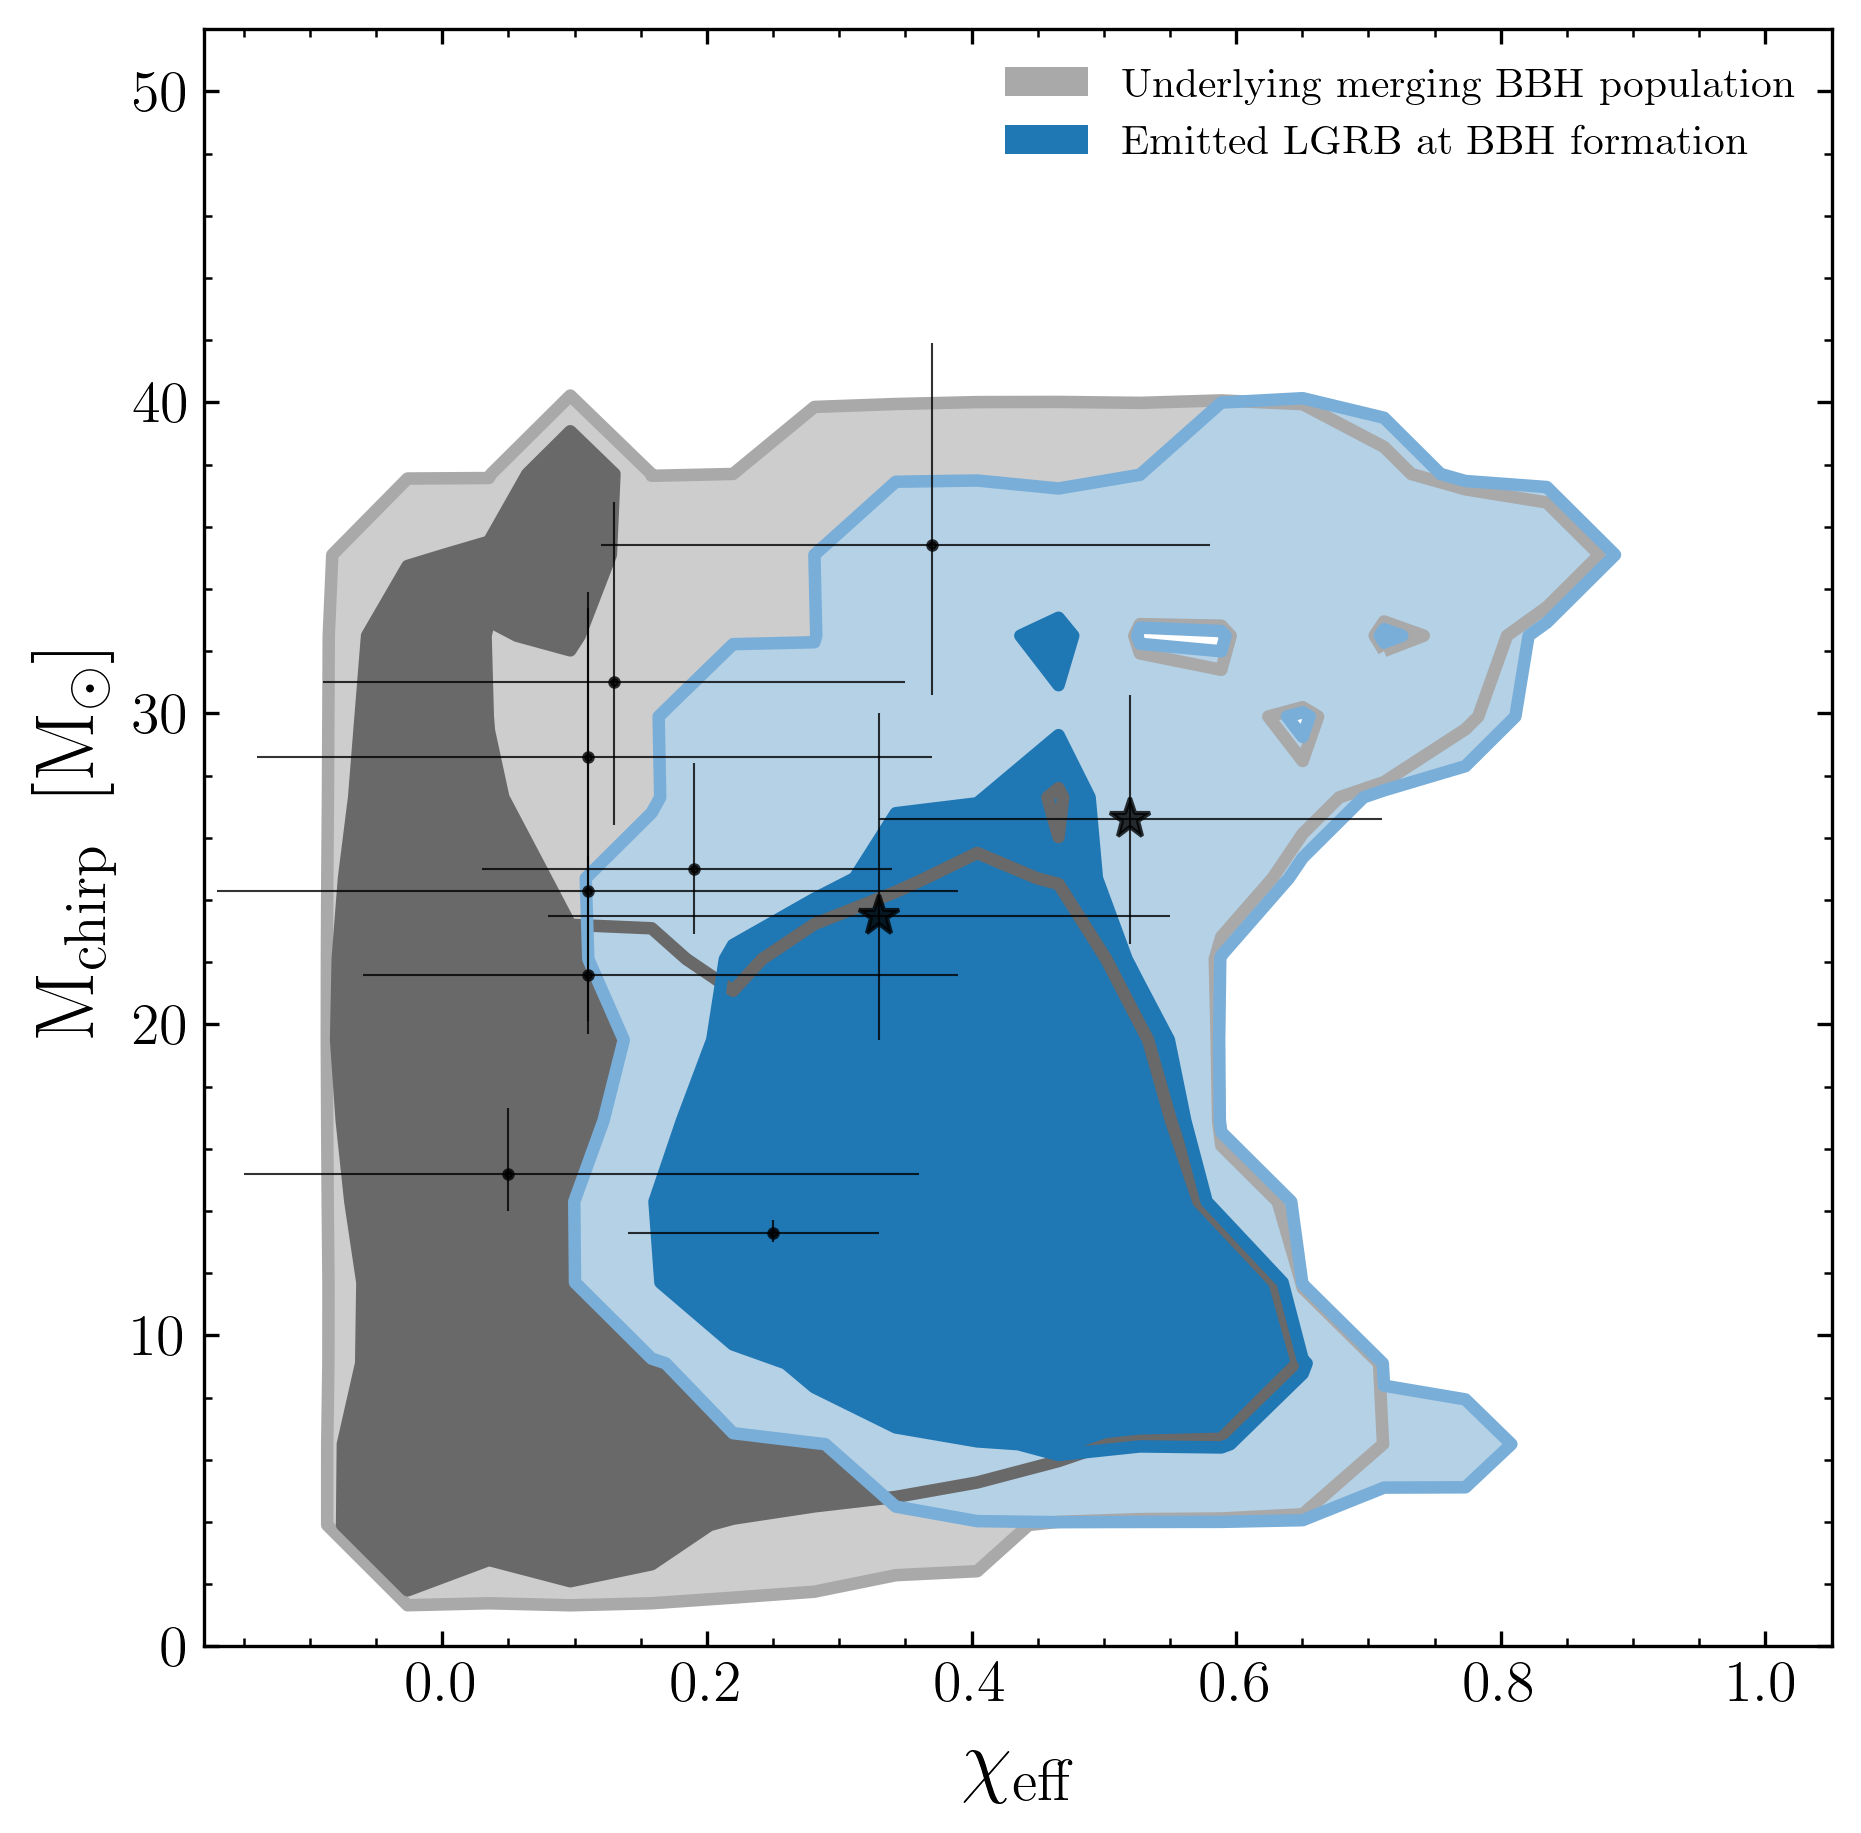

In [13]:
from corner import hist2d
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

paramNames = [r'$\chi_\mathrm{eff}$',r'$\mathrm{M}_\mathrm{chirp} \, \, \, $[M$_\odot$]']
Min_max_panels = [[-0.18,1.05],[0.,52.]]
smooth = 0.
bins=20
plot_datapoints = False
fontsize = 20
levels=(0.90,0.999)

hist2d(sample_inf[0],
       sample_inf[1],
       fig=fig,
       bins=bins,
       weights=w_sample_inf,
       labels=paramNames,
       label_kwargs = {'fontsize' : fontsize},
       range=Min_max_panels,
       color= "dimgrey",
       smooth=smooth,
       plot_datapoints=plot_datapoints,
       fill_contours=True,
       no_fill_contours=False,
       plot_density=False,
       contour_kwargs={'linewidths':3, 'colors': ['darkgray','dimgrey']},
       levels=levels)
hist2d(sample_LGRB[0],
       sample_LGRB[1],
       fig=fig,
       bins=bins,
       weights=w_sample_LGRB,
       labels=paramNames,
       label_kwargs = {'fontsize' : fontsize},
       range=Min_max_panels,
       color= "tab:blue",
       smooth=smooth,
       plot_datapoints=plot_datapoints,
       no_fill_contours=False,
       fill_contours=True,
       plot_density=False,
       contour_kwargs={'linewidths':3, 'colors': ['#79aed9','tab:blue']},
       levels=levels)

plt.errorbar(GW_events_chi_eff_LGRB,GW_events_m_chirp_LGRB,xerr=GW_events_chi_eff_LGRB_err,yerr=GW_events_m_chirp_LGRB_err,fmt='.',elinewidth=0.5,color='black',label='O3a',alpha=0.8)
plt.errorbar(GW_events_chi_eff_LGRB_special,GW_events_m_chirp_LGRB_special,xerr=GW_events_chi_eff_LGRB_special_err,yerr=GW_events_m_chirp_LGRB_special_err,fmt='*',markersize=10,elinewidth=0.5,color='black',label='O3a',alpha=0.8)

plt.xlabel(r'$\chi_\mathrm{eff}$',fontsize=fontsize)
plt.ylabel(r'$\mathrm{M}_\mathrm{chirp} \,\,\, [\mathrm{M}_\odot]$',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=14)
legend_elements = [Patch(facecolor='darkgray', label='Underlying merging BBH population'), 
                   Patch(facecolor='tab:blue', label='Emitted LGRB at BBH formation')]
plt.legend(handles=legend_elements,loc=1,fontsize=10)
plt.savefig('./plots/arXiv_210615841_chi_eff_m_chirp_LGRB.pdf', dpi=300, bbox_inches='tight')